<a href="https://colab.research.google.com/github/AbikshaaDevi/DataScience_Tasks/blob/main/AssTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
df=pd.read_csv("/content/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [13]:
df['Performance Index'].unique()

array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

In [14]:
x=df.drop(['Performance Index'],axis=1)
y=df['Performance Index']

In [17]:
features=['Hours Studied','Previous Scores']
X=df[features]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
le = LabelEncoder()
x['Extracurricular Activities'] = le.fit_transform(x['Extracurricular Activities'])
y=le.fit_transform(y)

In [27]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

In [29]:
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y, y_pred)

print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

MSE: 6.54, RMSE: 2.56, R²: 0.98


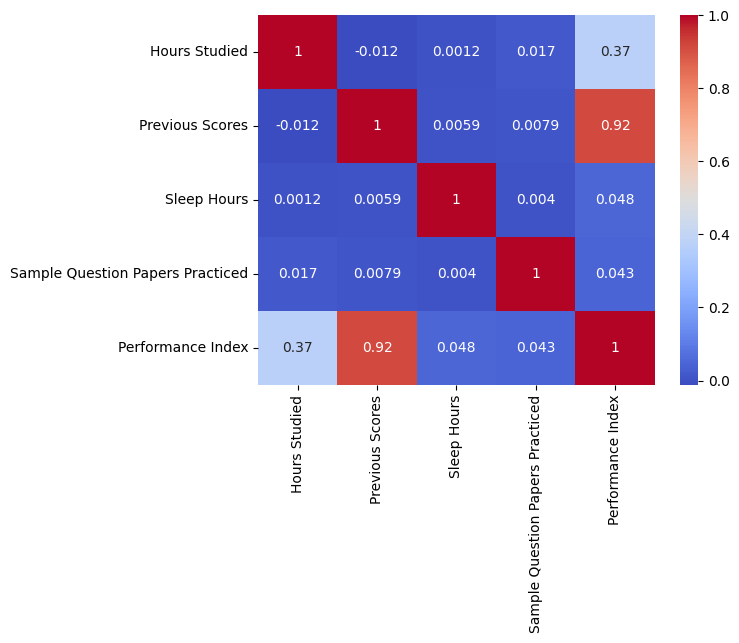

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

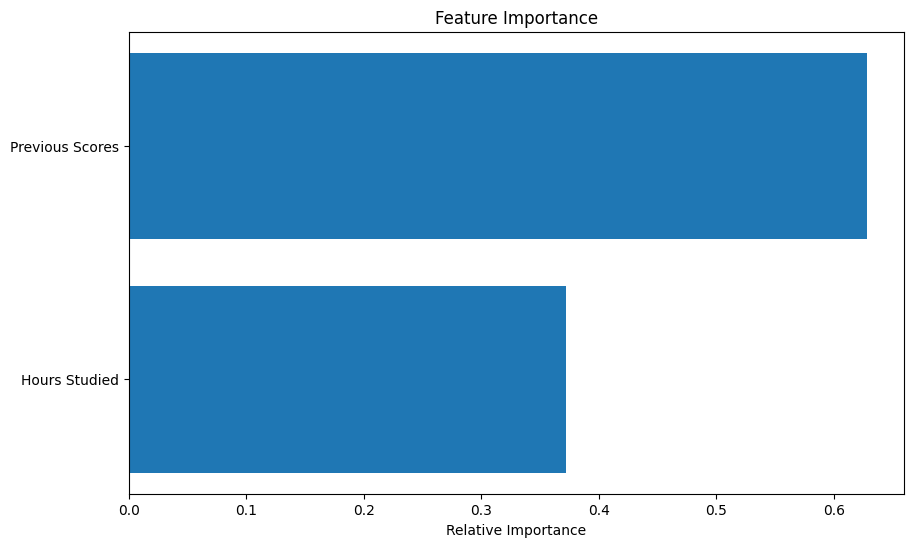

In [30]:
importances = model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()